In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model import NewsVendorModel
from single_agent import SingleAgentPQModel

import params

In [2]:
# Simulate game 
agent_types = ['greedy', 'greedy']


model = NewsVendorModel(agent_type=agent_types)

for _ in range(params.ROUNDS):
    model.step()

# Pull data 
model_df = model.datacollector.get_model_vars_dataframe()   # index: Step
agent_df = model.datacollector.get_agent_vars_dataframe()   # index: Step, AgentID

In [10]:
#Simulate single agent model
m = SingleAgentPQModel(agent_type="UCB")   #Greedy - UCB - Thompson
for _ in range(params.ROUNDS):
    m.step()

df_single = m.datacollector.get_model_vars_dataframe()
print(df_single.head())


   t  epsilon     p   q  expected_demand  realized_demand      sales  \
0  0      0.8   2.0  35             93.0        82.600159  35.000000   
1  1      0.8  23.0  39             19.5        27.004512  27.004512   
2  2      0.8   2.0  35             93.0        73.489648  35.000000   
3  3      0.8  20.0  37             30.0        16.978205  16.978205   
4  4      0.8  22.0  18             23.0        19.837574  18.000000   

       profit  
0  -35.000000  
1  504.103775  
2  -35.000000  
3  228.564099  
4  342.000000  


In [4]:
df = agent_df.reset_index()

price_data = df[df["AgentID"] == 1][["Step", "Order Quantity"]].rename(columns={"Order Quantity": "Price"})

qty_data = df[df["AgentID"] == 2][["Step", "Order Quantity", "Reward"]].rename(columns={"Order Quantity": "Quantity"})

combined_df = pd.merge(price_data, qty_data, on="Step")

final_df = pd.merge(combined_df, model_df, left_on="Step", right_index=True)

In [5]:
final_df.tail(50)


,Step,Price,Quantity,Reward,Regret,Demand
314,315,17.9,35.0,521.500000,0,34.384290
315,316,17.9,35.0,510.478799,0,38.015458
316,317,17.9,35.0,521.500000,0,30.375762
317,318,17.9,35.0,438.726136,0,47.245839
318,319,17.9,35.0,521.500000,0,25.566964
319,320,17.9,35.0,352.648651,0,45.173503
320,321,17.9,35.0,521.500000,0,35.443489
321,322,17.9,35.0,521.500000,0,49.062471
322,323,17.9,35.0,521.500000,0,44.858690
323,324,17.9,35.0,521.500000,0,55.556462


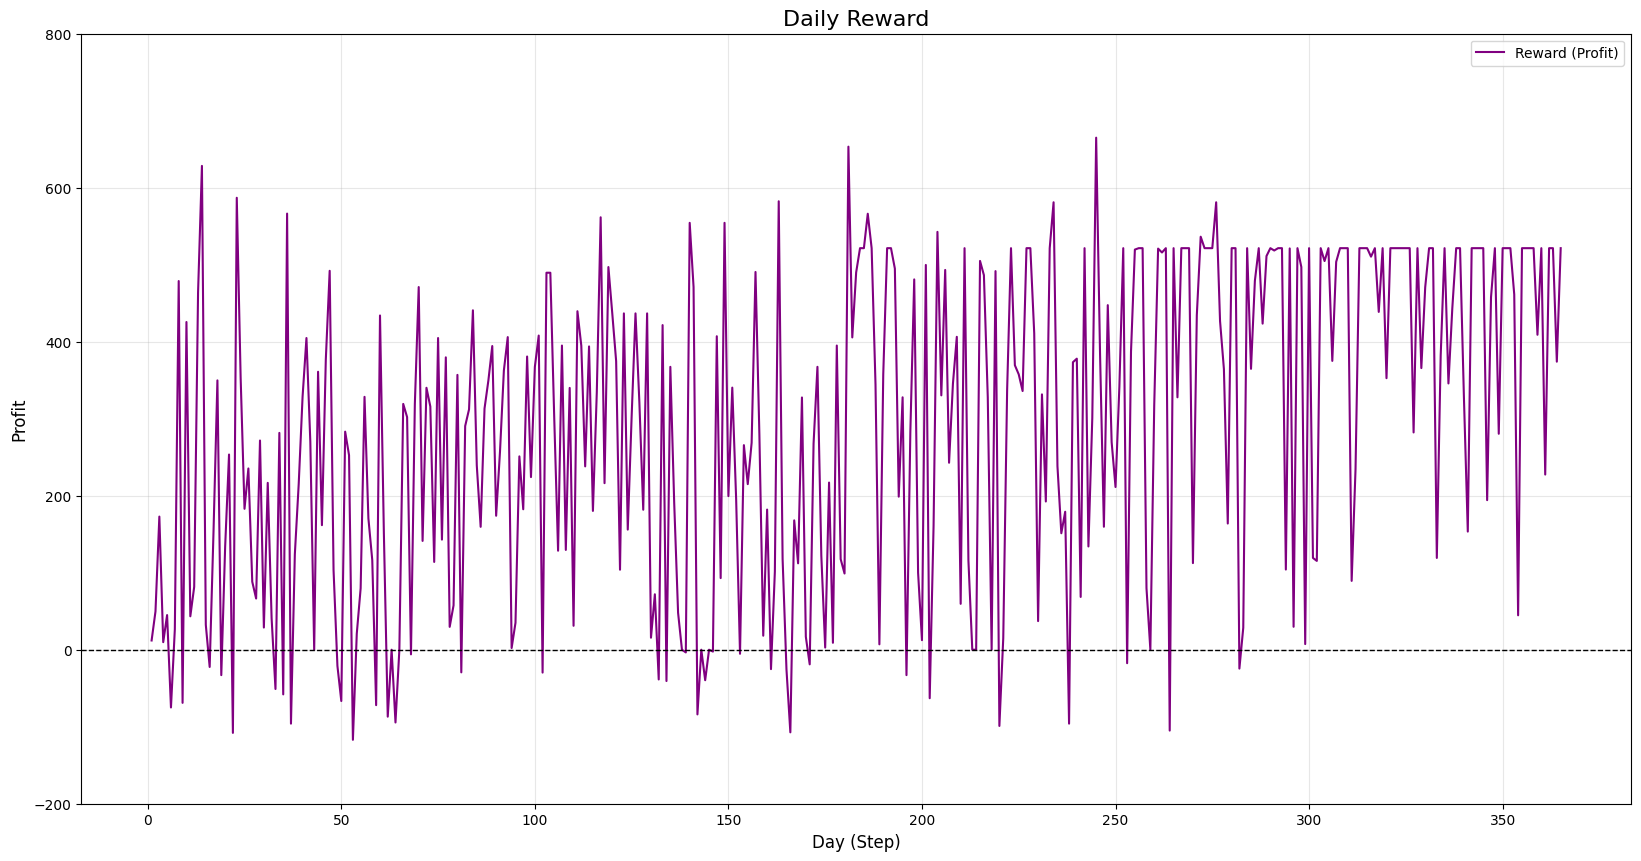

In [6]:
#Reward Plot

reward_data = df[df["AgentID"] == 1][["Step", "Reward"]]

plt.figure(figsize=(20, 10))
plt.plot(reward_data['Step'], reward_data['Reward'], color='purple', label='Reward (Profit)', linewidth=1.5)

plt.ylim(-200, 800)

plt.axhline(0, color='black', linewidth=1, linestyle='--')

plt.xlabel('Day (Step)', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Daily Reward', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

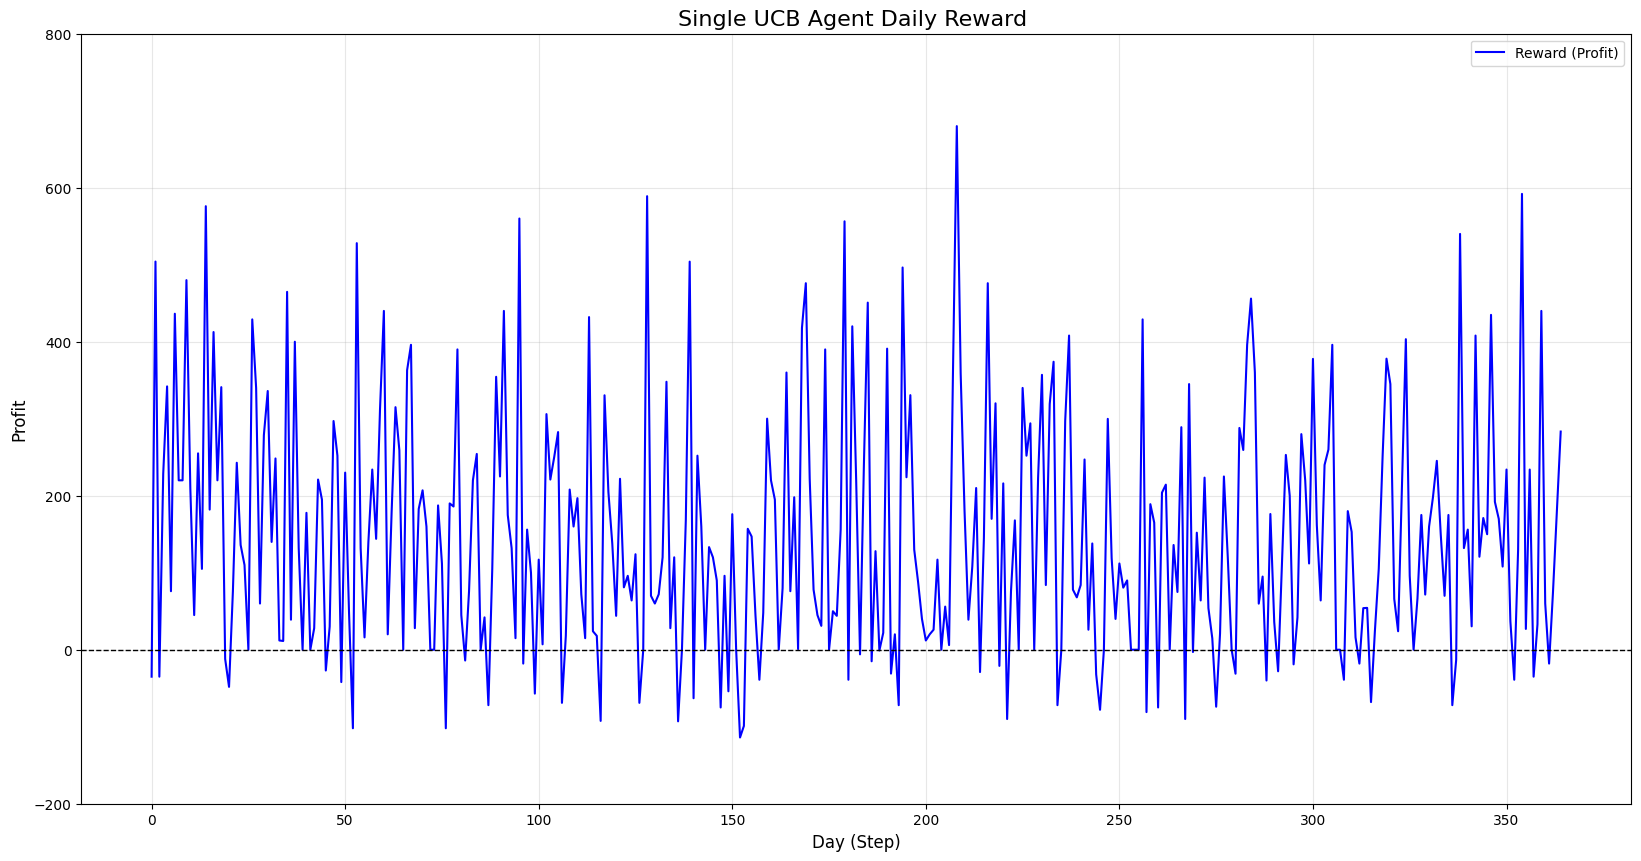

In [13]:
#Single Agent Reward Plot

reward_single_data = df_single[["t", "profit"]]  
plt.figure(figsize=(20, 10))
plt.plot(reward_single_data['t'], reward_single_data['profit'], color='blue', label='Reward (Profit)', linewidth=1.5)    
plt.ylim(-200, 800)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.xlabel('Day (Step)', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title(f'Single {m.agent_type} Agent Daily Reward ', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [ ]:
#Optimal values when demand distribution is known

print("Optimal (p,q):", params.opt_QP)
print("Optimal expected profit:", params.opt_profit)

Optimal (p,q): (17.6, 40.0)
Optimal expected profit: 497.68295084686594
